# Synthetic Data Generation for MVPC  
This notebook generates synthetic datasets under **MAR** and **MNAR** missingness mechanisms, following the structure of the MVPC paper.

We use:
- A random Gaussian DAG  
- Collider detection  
- MAR or MNAR missingness indicator selection  
- Threshold‑based missingness injection  
- MCAR reference dataset  

The output includes:
- Complete data  
- Missing data (MAR or MNAR)  
- MCAR reference  
- Ground truth structure (DAG, colliders, missingness parents)


In [1]:
import sys
import os

# Path to the project root (one level above the notebooks folder)
project_root = os.path.abspath("..")

# Add to Python path if not already present
if project_root not in sys.path:
    sys.path.append(project_root)

print("Project root added:", project_root)



Project root added: c:\Users\sofia\OneDrive\Υπολογιστής\Thesis_New


In [2]:
%load_ext autoreload
%autoreload 2


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

from data.synthetic_data_generation.synthetic_generator import gen_data



In [4]:
# Set Parameters


num_samples = 2000
num_var = 20
num_extra_e = 3
num_m = 6
seed = 42

p_missing_h = 0.9
p_missing_l = 0.01


In [5]:
# Generate MAR Dataset

result_mar = gen_data(
    num_samples=num_samples,
    mode="mar",
    num_var=num_var,
    num_extra_e=num_extra_e,
    num_m=num_m,
    seed=seed,
    p_missing_h=p_missing_h,
    p_missing_l=p_missing_l,
)

X_complete_mar = result_mar["data_complete"]
X_mar = result_mar["data_m"]
X_ref_mar = result_mar["data_ref"]
gt_mar = result_mar["ground_truth"]

print("MAR dataset generated.")


MAR dataset generated.


In [6]:
# Generate MNAR Dataset


result_mnar = gen_data(
    num_samples=num_samples,
    mode="mnar",
    num_var=num_var,
    num_extra_e=num_extra_e,
    num_m=num_m,
    seed=seed,
    p_missing_h=p_missing_h,
    p_missing_l=p_missing_l,
)

X_complete_mnar = result_mnar["data_complete"]
X_mnar = result_mnar["data_m"]
X_ref_mnar = result_mnar["data_ref"]
gt_mnar = result_mnar["ground_truth"]

print("MNAR dataset generated.")


MNAR dataset generated.


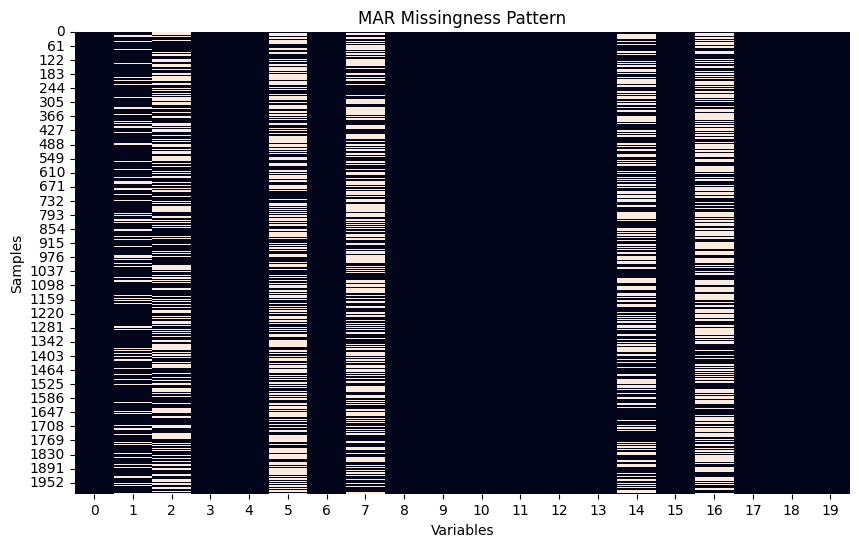

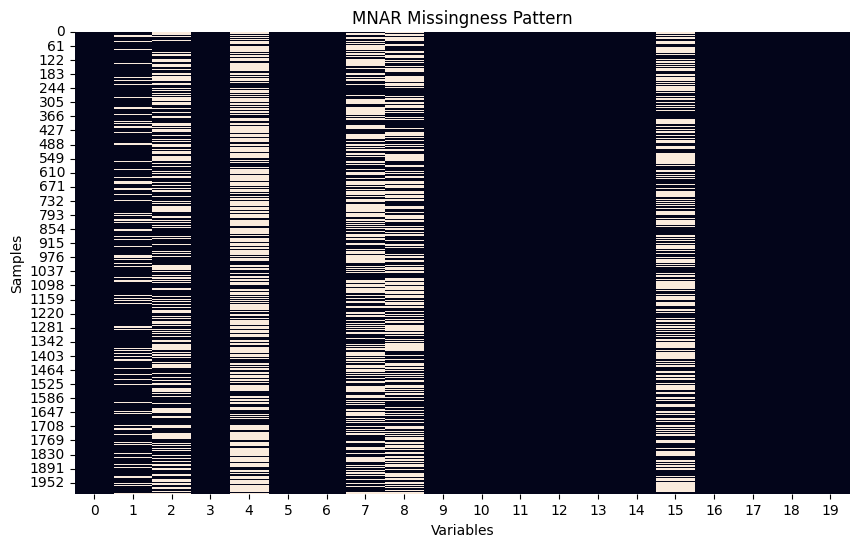

In [7]:
# Visualize Missingness Patterns

def plot_missingness(data, title):
    plt.figure(figsize=(10, 6))
    sns.heatmap(pd.isna(data), cbar=False)
    plt.title(title)
    plt.xlabel("Variables")
    plt.ylabel("Samples")
    plt.show()

plot_missingness(X_mar, "MAR Missingness Pattern")
plot_missingness(X_mnar, "MNAR Missingness Pattern")


In [8]:
print("MAR missingness indicators:", gt_mar["m_ind"])
print("MAR missingness parents:", gt_mar["parent_m_ind"])
print("MAR colliders:", gt_mar["colliders"])

print("\nMNAR missingness indicators:", gt_mnar["m_ind"])
print("MNAR missingness parents:", gt_mnar["parent_m_ind"])
print("MNAR colliders:", gt_mnar["colliders"])


MAR missingness indicators: [np.int64(2), np.int64(7), np.int64(1), 5, 16, 14]
MAR missingness parents: [8, 4, 15, 0, 13, 11]
MAR colliders: [4, 6, 8, 11, 15, 19]

MNAR missingness indicators: [np.int64(2), np.int64(7), np.int64(1), 8, 4, 15]
MNAR missingness parents: [8, 4, 15, np.int64(10), np.int64(16), np.int64(5)]
MNAR colliders: [4, 6, 8, 11, 15, 19]


In [41]:
# Folder path
save_dir = "../data/synthetic_data_csv_files"

# Create folder if needed
os.makedirs(save_dir, exist_ok=True)

# Save MAR datasets
pd.DataFrame(X_complete_mar).to_csv(f"{save_dir}/complete_mar.csv", index=False)
pd.DataFrame(X_mar).to_csv(f"{save_dir}/missing_mar.csv", index=False)
pd.DataFrame(X_ref_mar).to_csv(f"{save_dir}/mcar_reference_mar.csv", index=False)

# Save MNAR datasets
pd.DataFrame(X_complete_mnar).to_csv(f"{save_dir}/complete_mnar.csv", index=False)
pd.DataFrame(X_mnar).to_csv(f"{save_dir}/missing_mnar.csv", index=False)
pd.DataFrame(X_ref_mnar).to_csv(f"{save_dir}/mcar_reference_mnar.csv", index=False)

print("All datasets saved to:", save_dir)


All datasets saved to: ../data/synthetic_data_csv_files


In [29]:
# Save ground truth structures
pd.DataFrame(gt_mar["adj"]).to_csv(f"{save_dir}/adjacency_mar.csv", index=False)
pd.DataFrame(gt_mnar["adj"]).to_csv(f"{save_dir}/adjacency_mnar.csv", index=False)

pd.DataFrame({"colliders": gt_mar["colliders"]}).to_csv(f"{save_dir}/colliders_mar.csv", index=False)
pd.DataFrame({"colliders": gt_mnar["colliders"]}).to_csv(f"{save_dir}/colliders_mnar.csv", index=False)

pd.DataFrame({"m_ind": gt_mar["m_ind"], "parent_m_ind": gt_mar["parent_m_ind"]}).to_csv(
    f"{save_dir}/missingness_structure_mar.csv", index=False
)

pd.DataFrame({"m_ind": gt_mnar["m_ind"], "parent_m_ind": gt_mnar["parent_m_ind"]}).to_csv(
    f"{save_dir}/missingness_structure_mnar.csv", index=False
)

print("Ground truth metadata saved.")


Ground truth metadata saved.


In [42]:
# Save Ground Truth Metadata 


# Save to the project-level data folder
save_dir = "../data/synthetic_data_csv_files"

# Create folder if needed
os.makedirs(save_dir, exist_ok=True)

# --- Save adjacency matrices ---
pd.DataFrame(gt_mar["adj"]).to_csv(f"{save_dir}/adjacency_mar.csv", index=False)
pd.DataFrame(gt_mnar["adj"]).to_csv(f"{save_dir}/adjacency_mnar.csv", index=False)

# --- Save collider lists ---
pd.DataFrame({"colliders": gt_mar["colliders"]}).to_csv(
    f"{save_dir}/colliders_mar.csv", index=False
)
pd.DataFrame({"colliders": gt_mnar["colliders"]}).to_csv(
    f"{save_dir}/colliders_mnar.csv", index=False
)

# --- Save missingness indicator structure ---
pd.DataFrame({
    "m_ind": gt_mar["m_ind"],
    "parent_m_ind": gt_mar["parent_m_ind"]
}).to_csv(f"{save_dir}/missingness_structure_mar.csv", index=False)

pd.DataFrame({
    "m_ind": gt_mnar["m_ind"],
    "parent_m_ind": gt_mnar["parent_m_ind"]
}).to_csv(f"{save_dir}/missingness_structure_mnar.csv", index=False)

print("Ground truth metadata saved to:", save_dir)


Ground truth metadata saved to: ../data/synthetic_data_csv_files


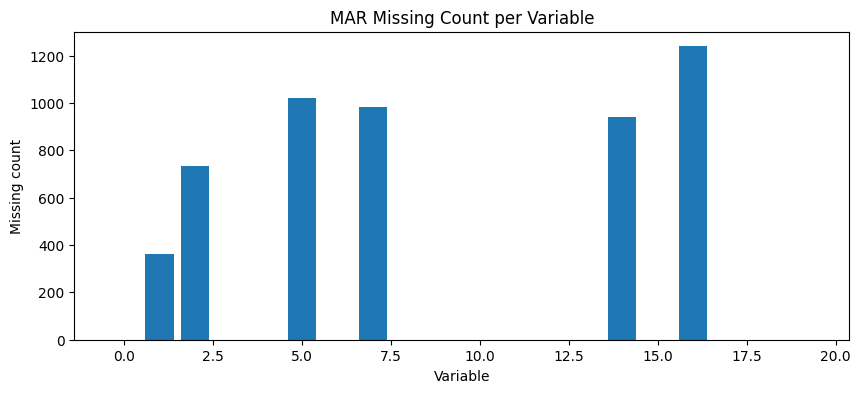

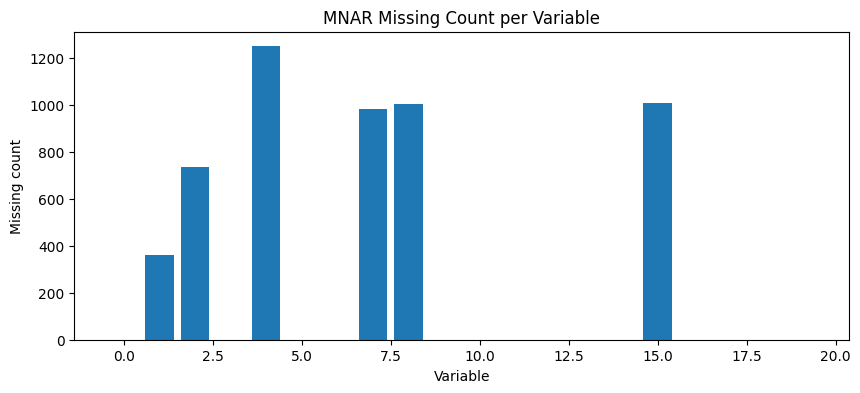

In [43]:
def plot_missing_counts(X, title):
    counts = pd.isna(X).sum(axis=0)
    plt.figure(figsize=(10,4))
    plt.bar(range(len(counts)), counts)
    plt.title(title)
    plt.xlabel("Variable")
    plt.ylabel("Missing count")
    plt.show()

plot_missing_counts(X_mar, "MAR Missing Count per Variable")
plot_missing_counts(X_mnar, "MNAR Missing Count per Variable")


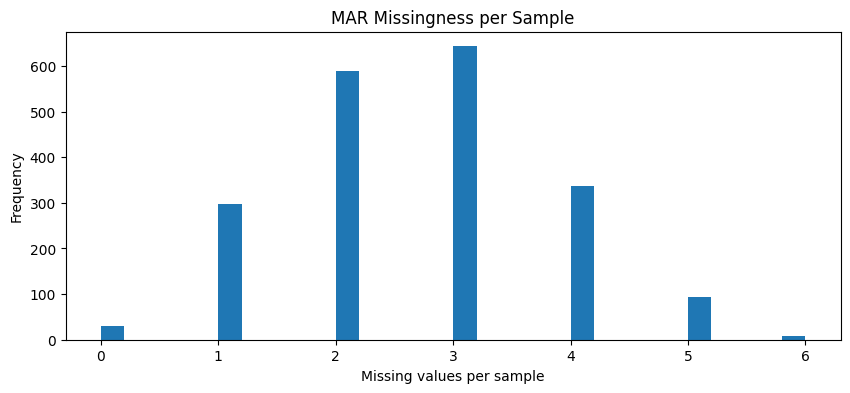

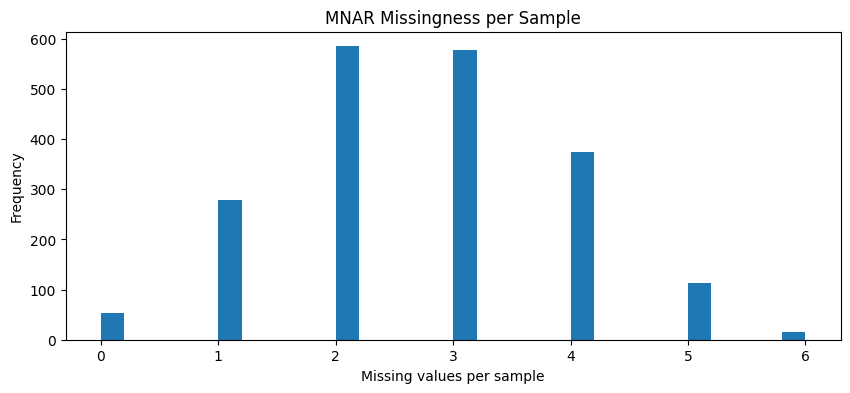

In [44]:
def plot_sample_missingness(X, title):
    counts = pd.isna(X).sum(axis=1)
    plt.figure(figsize=(10,4))
    plt.hist(counts, bins=30)
    plt.title(title)
    plt.xlabel("Missing values per sample")
    plt.ylabel("Frequency")
    plt.show()

plot_sample_missingness(X_mar, "MAR Missingness per Sample")
plot_sample_missingness(X_mnar, "MNAR Missingness per Sample")
